# CTR Dataset(dataset_super_up_labeled.csv) Analysis
ad_type = super up </br>
user = viewer

In [50]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [69]:
path = '/Users/bunjang/bun-analytics/NanumBarunpenR.otf'
fontprop = fm.FontProperties(fname=path, size=12)

In [26]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [27]:
# ONLY super up
parse_date = lambda val : pd.datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv('dataset_super_up_labeled.csv', parse_dates = ['updated'], date_parser = parse_date)

In [46]:
df.columns

Index(['id', 'viewer_uid', 'viewer_device', 'keyword', 'updated', 'pid',
       'ad_type', 'click', 'u_name', 'u_description', 'u_favorite_count',
       'u_comment_count', 'u_review_count', 'u_grade', 'u_item_count',
       'u_interest', 'u_bizlicense', 'u_following_cnt', 'u_sex', 'u_age',
       'u_married', 'u_birthdate', 'u_is_identification',
       'u_parcel_post_count', 'u_bunpay_count', 'u_transfer_count',
       'u_bunp_account_count', 'u_bunp_meet_count', 'p_updated', 'p_name',
       'p_keyword', 'p_price', 'p_taekpo', 'p_exchg', 'p_category_id', 'p_qty',
       'p_image_count', 'p_emergency_cnt', 'p_comment_cnt',
       'p_recent_comment_cnt', 'p_interest', 'p_recent_interest', 'p_pfavcnt',
       'p_recent_pavcnt', 'p_ptranscnt', 'p_recent_ptranscnt', 'p_is_adult'],
      dtype='object')

In [29]:
df.head()

,id,viewer_uid,viewer_device,keyword,updated,pid,ad_type,click,u_name,u_description,...,p_emergency_cnt,p_comment_cnt,p_recent_comment_cnt,p_interest,p_recent_interest,p_pfavcnt,p_recent_pavcnt,p_ptranscnt,p_recent_ptranscnt,p_is_adult
0,4889630649,5402752,a,맨투맨,2019-11-19 00:00:00,107880315,super_up,0,mcfukdonld,뚱ㅇㅣㅣㅣ,...,0,3,0,3276,0,49,0,0,0,0
1,4889201941,5402752,a,맨투맨,2019-11-19 00:03:23,107880315,super_up,0,mcfukdonld,뚱ㅇㅣㅣㅣ,...,0,3,0,3276,0,49,0,0,0,0
2,4889136537,7604337,a,NaN,2019-11-19 00:00:16,107880315,super_up,1,호로록냠냠냠,NaN,...,0,3,0,3276,0,49,0,0,0,0
3,4889790709,5987464,i,NaN,2019-11-19 00:08:08,107880315,super_up,1,유좀,NaN,...,0,3,0,3276,0,49,0,0,0,0
4,4889790885,5987464,i,NaN,2019-11-19 00:08:11,107880315,super_up,1,유좀,NaN,...,0,3,0,3276,0,49,0,0,0,0


The number of clicks in total
Total number : 144067
Proportion of unclick : 0.7809491417187836
Proportion of click : 0.21905085828121637


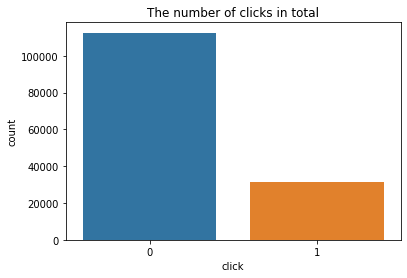

In [49]:
print('The number of clicks in total')
print('Total number :', len(df))
sns.countplot(x='click', data = df)
plt.title('The number of clicks in total')
plt.savefig('click_total.png')
print('Proportion of unclick :', len(df[df['click'] == 0])/len(df))
print('Proportion of click :', len(df[df['click'] == 1])/len(df))

In [31]:
groupby_keyword = pd.DataFrame(df.groupby('keyword')['viewer_uid'].count()).sort_values(by = ['viewer_uid'], ascending = False)

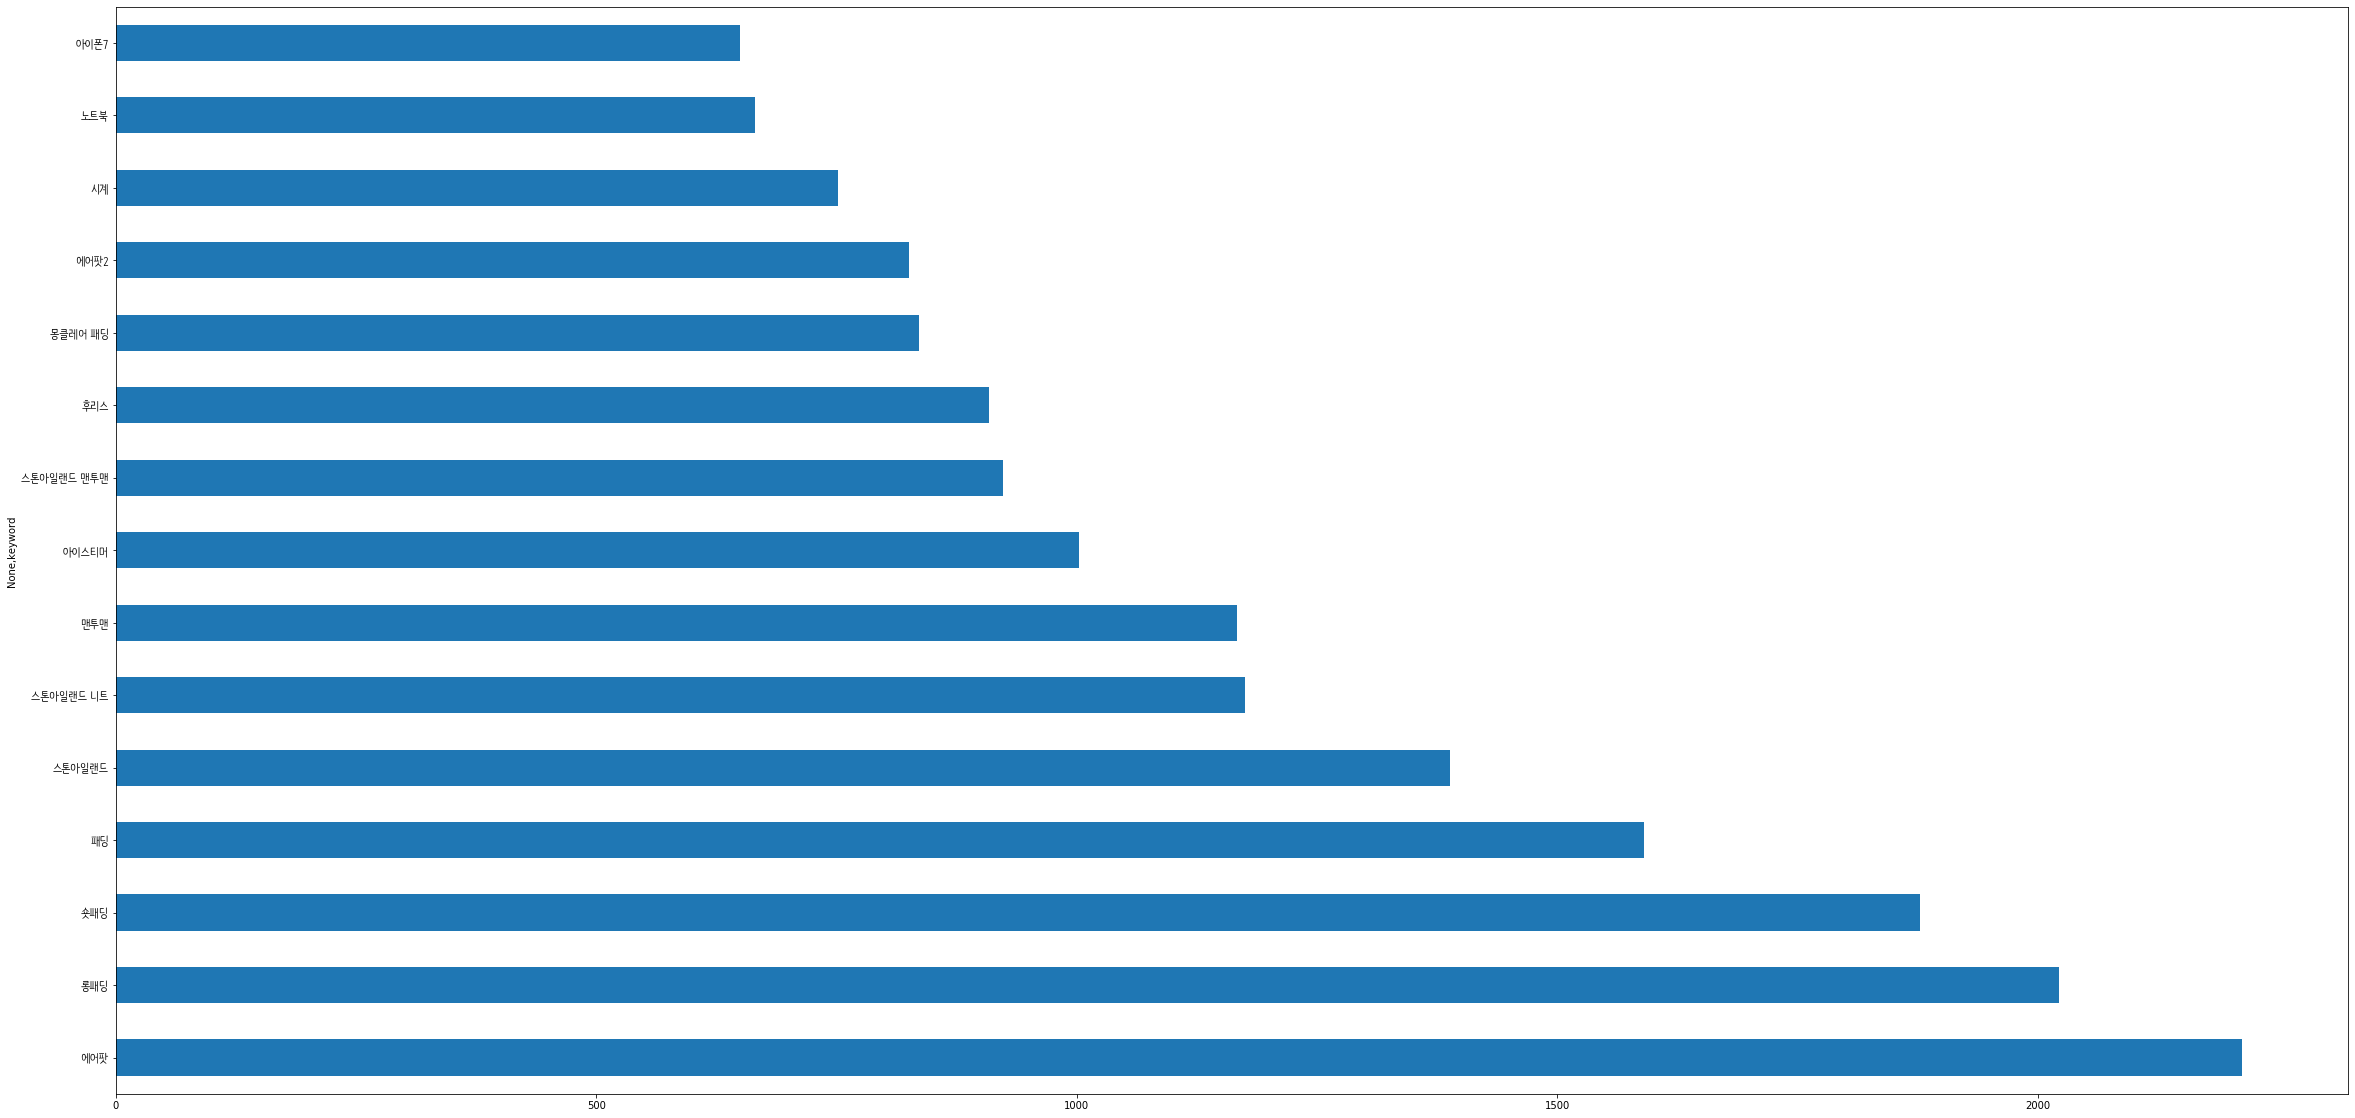

In [82]:
ax = groupby_keyword[:15].unstack().plot.barh(figsize=(40,20))
ax.set_yticklabels(['에어팟', '롱패딩', '숏패딩', '패딩', '스톤아일랜드', '스톤아일랜드 니트', '맨투맨', '아이스티머', '스톤아일랜드 맨투맨', '후리스', '몽클레어 패딩', '에어팟2', '시계', '노트북', '아이폰7'],fontproperties=fontprop)
plt.savefig('keyword_viewercnt.png')

In [79]:
groupby_keyword[:15]

,viewer_uid
keyword,
에어팟,2212
롱패딩,2022
숏패딩,1877
패딩,1590
스톤아일랜드,1388
스톤아일랜드 니트,1175
맨투맨,1167
아이스티머,1002
스톤아일랜드 맨투맨,923


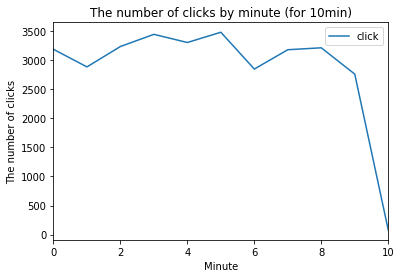

In [83]:
times = pd.DatetimeIndex(df['updated'])
df.groupby([times.minute]).agg({'click':'sum'}).plot()
plt.ylabel('The number of clicks')
plt.xlabel('Minute')
plt.title('The number of clicks by minute (for 10min)')
plt.savefig('click over time.png')

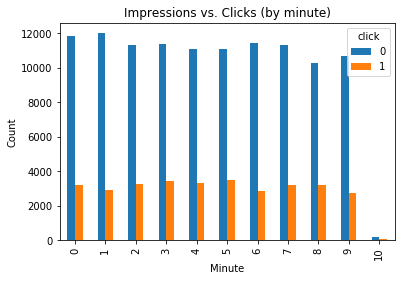

In [84]:
df.groupby([times.minute, 'click']).size().unstack().plot(kind='bar')
plt.xlabel('Minute')
plt.ylabel('Count')
plt.title('Impressions vs. Clicks (by minute)')
plt.savefig('clickvs.unclick_overtime.png')

In [36]:
df_click = df[df['click'] == 1][['updated', 'click']].resample('Min', on='updated').count()
df_min = df[['updated', 'click']].resample('Min', on='updated').count()
df_min = df_min.rename(columns = {'click':'impressions'})
df_min['click_num'] = df_click['click']
df_min['CTR'] = df_min['click_num']/df_min['impressions']
df_min.head()

,updated,impressions,click_num,CTR
updated,,,,
2019-11-19 00:00:00,14996,14996,3181,0.212123
2019-11-19 00:01:00,14878,14878,2879,0.193507
2019-11-19 00:02:00,14562,14562,3229,0.221742
2019-11-19 00:03:00,14784,14784,3438,0.232549
2019-11-19 00:04:00,14369,14369,3298,0.229522


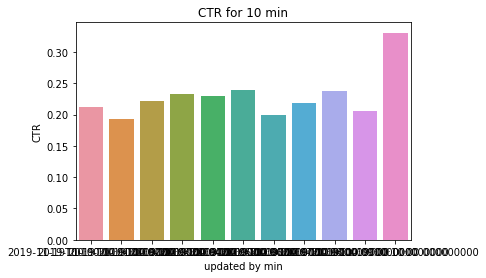

In [85]:
sns.barplot(y = 'CTR', x = df_min.index, data = df_min)
plt.xlabel('updated by min')
plt.title('CTR for 10 min')
plt.savefig('ctrbytime.png')

In [88]:
# the number of viewer for each product
viewer_count = df.groupby('pid')['viewer_uid'].count().sort_values(ascending = False).reset_index().rename(columns = {'viewer_uid':'viewer_cnt'})
viewer_count.describe()

,pid,viewer_cnt
count,4.657000e+03,4657.000000
mean,1.043755e+08,30.935581
std,1.287252e+07,27.479103
min,5.133755e+06,1.000000
25%,1.028112e+08,14.000000
50%,1.103683e+08,24.000000
75%,1.116304e+08,38.000000
max,1.120482e+08,288.000000


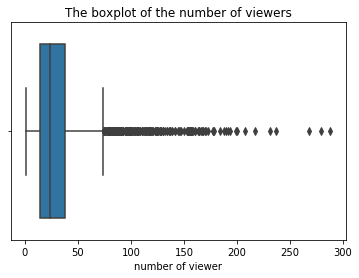

In [89]:
B = sns.boxplot('viewer_cnt', data = viewer_count)
plt.xlabel('number of viewer')
plt.title('The boxplot of the number of viewers')
plt.savefig('viewercnt_boxplot.png')
## IQR  = Q3 - Q1
## MAX = Q3 + 1.5 * IQR
## in this case, max is 74

In [91]:
top_pid = viewer_count[viewer_count['viewer_cnt'] > 74]['pid'].tolist() # outliers
viewer_count[viewer_count['viewer_cnt'] > 74] # outliers

,pid,viewer_cnt
0,70126719,288
1,105047659,279
2,82101196,268
3,110261961,237
4,89149032,231
...,...,...
294,110682753,75
295,84645686,75
296,110963415,75
297,111012132,75


In [92]:
outlier_df = df[df['pid'] .isin(top_pid)]
outlier_df

,id,viewer_uid,viewer_device,keyword,updated,pid,ad_type,click,u_name,u_description,...,p_emergency_cnt,p_comment_cnt,p_recent_comment_cnt,p_interest,p_recent_interest,p_pfavcnt,p_recent_pavcnt,p_ptranscnt,p_recent_ptranscnt,p_is_adult
49,4889630649,5402752,a,맨투맨,2019-11-19 00:00:00,108211402,super_up,0,mcfukdonld,뚱ㅇㅣㅣㅣ,...,1,2,0,7348,0,104,0,0,0,0
50,4889284653,7736241,a,꼼데가르송 맨투맨,2019-11-19 00:07:25,108211402,super_up,0,꿀매만팔아용,처음 장사해봐요ㅠㅠ,...,1,2,0,7348,0,104,0,0,0,0
51,4889673181,5142162,i,맨투맨,2019-11-19 00:04:05,108211402,super_up,0,t빈티지t,환불은 절대 안 되니 구매 전에 신중히 고민 해주세요,...,1,2,0,7348,0,104,0,0,0,0
52,4889745465,5310398,a,라코스테,2019-11-19 00:00:28,108211402,super_up,0,한은복,NaN,...,1,2,0,7348,0,104,0,0,0,0
53,4889418941,3406357,i,노스페이스 맨투맨,2019-11-19 00:02:38,108211402,super_up,0,기륑이,NaN,...,1,2,0,7348,0,104,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133723,4889171105,5825309,i,아이스티머,2019-11-19 00:06:36,111843918,super_up,0,max_story,문의해주시면 최대한 빨리 답장해두리겠습니다~\n상점에 없는 상품도 문의가능합니다~!!!,...,0,4,0,1475,0,51,0,0,0,0
133724,4889286449,3850232,a,아이스티머,2019-11-19 00:07:54,111843918,super_up,0,에펨포유,NaN,...,0,4,0,1475,0,51,0,0,0,0
133725,4889483937,618381,i,아이스티머,2019-11-19 00:09:09,111843918,super_up,0,남자화장실,NaN,...,0,4,0,1475,0,51,0,0,0,0
133726,4889435697,2252104,i,아이스티머,2019-11-19 00:09:27,111843918,super_up,0,카키코,NaN,...,0,4,0,1475,0,51,0,0,0,0


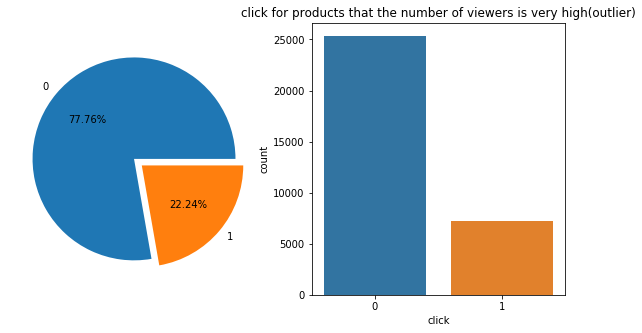

In [93]:
f,ax=plt.subplots(1,2,figsize=(10,5))

outlier_df['click'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_ylabel('')

sns.countplot('click',data=outlier_df,ax=ax[1])
plt.title('click for products that the number of viewers is very high(outlier)')
plt.savefig('top_products_view.png')
plt.show()

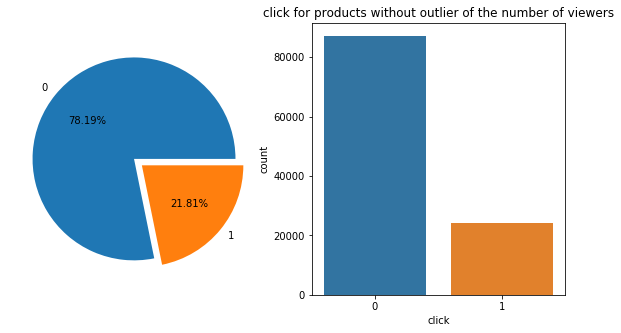

In [94]:
not_outlier_df = df[~df['pid'].isin(top_pid)]

f,ax=plt.subplots(1,2,figsize=(10,5))

not_outlier_df['click'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_ylabel('')

sns.countplot('click',data=not_outlier_df,ax=ax[1])
plt.title('click for products without outlier of the number of viewers')
plt.savefig('nontop_products_view.png')
plt.show()

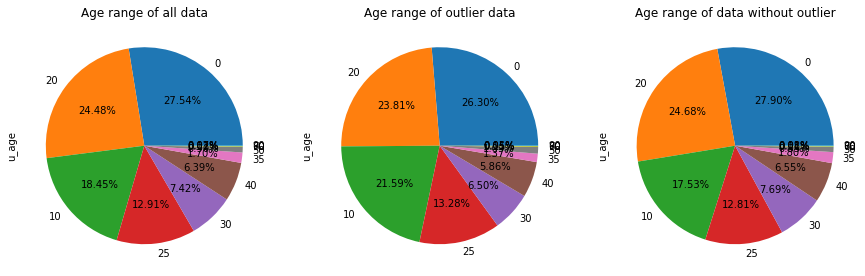

In [95]:
f,ax=plt.subplots(1,3,figsize=(15,5))

df['u_age'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Age range of all data')
outlier_df['u_age'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1])
ax[1].set_title('Age range of outlier data')
not_outlier_df['u_age'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[2])
ax[2].set_title('Age range of data without outlier')
plt.savefig('percentage_byage.png')

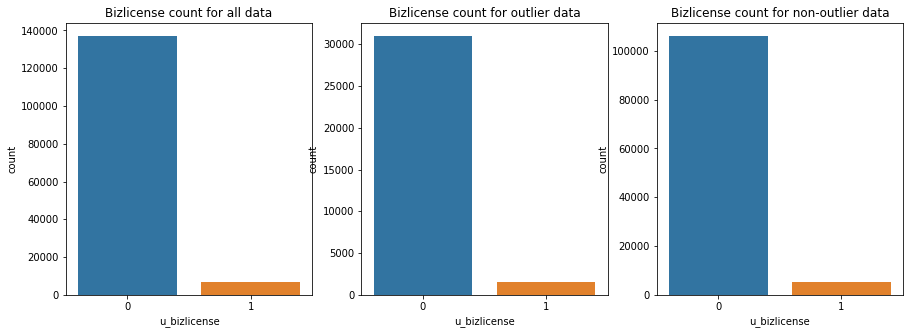

In [97]:
f,ax = plt.subplots(1,3, figsize = (15, 5))
sns.countplot('u_bizlicense', data = df, ax = ax[0])
# bizlicense = 4.89%
ax[0].set_title('Bizlicense count for all data')
sns.countplot('u_bizlicense', data = outlier_df, ax = ax[1])
ax[1].set_title('Bizlicense count for outlier data')
sns.countplot('u_bizlicense', data = not_outlier_df, ax = ax[2])
ax[2].set_title('Bizlicense count for non-outlier data')
plt.savefig('bizlicense.png')

In [242]:
# plt.hist(df[df['u_favorite_count']])
df['p_interest'].describe()

count    1.440670e+05
mean     1.110601e+04
std      7.998233e+04
min      0.000000e+00
25%      5.010000e+02
50%      1.680000e+03
75%      6.366000e+03
max      3.020267e+06
Name: p_interest, dtype: float64

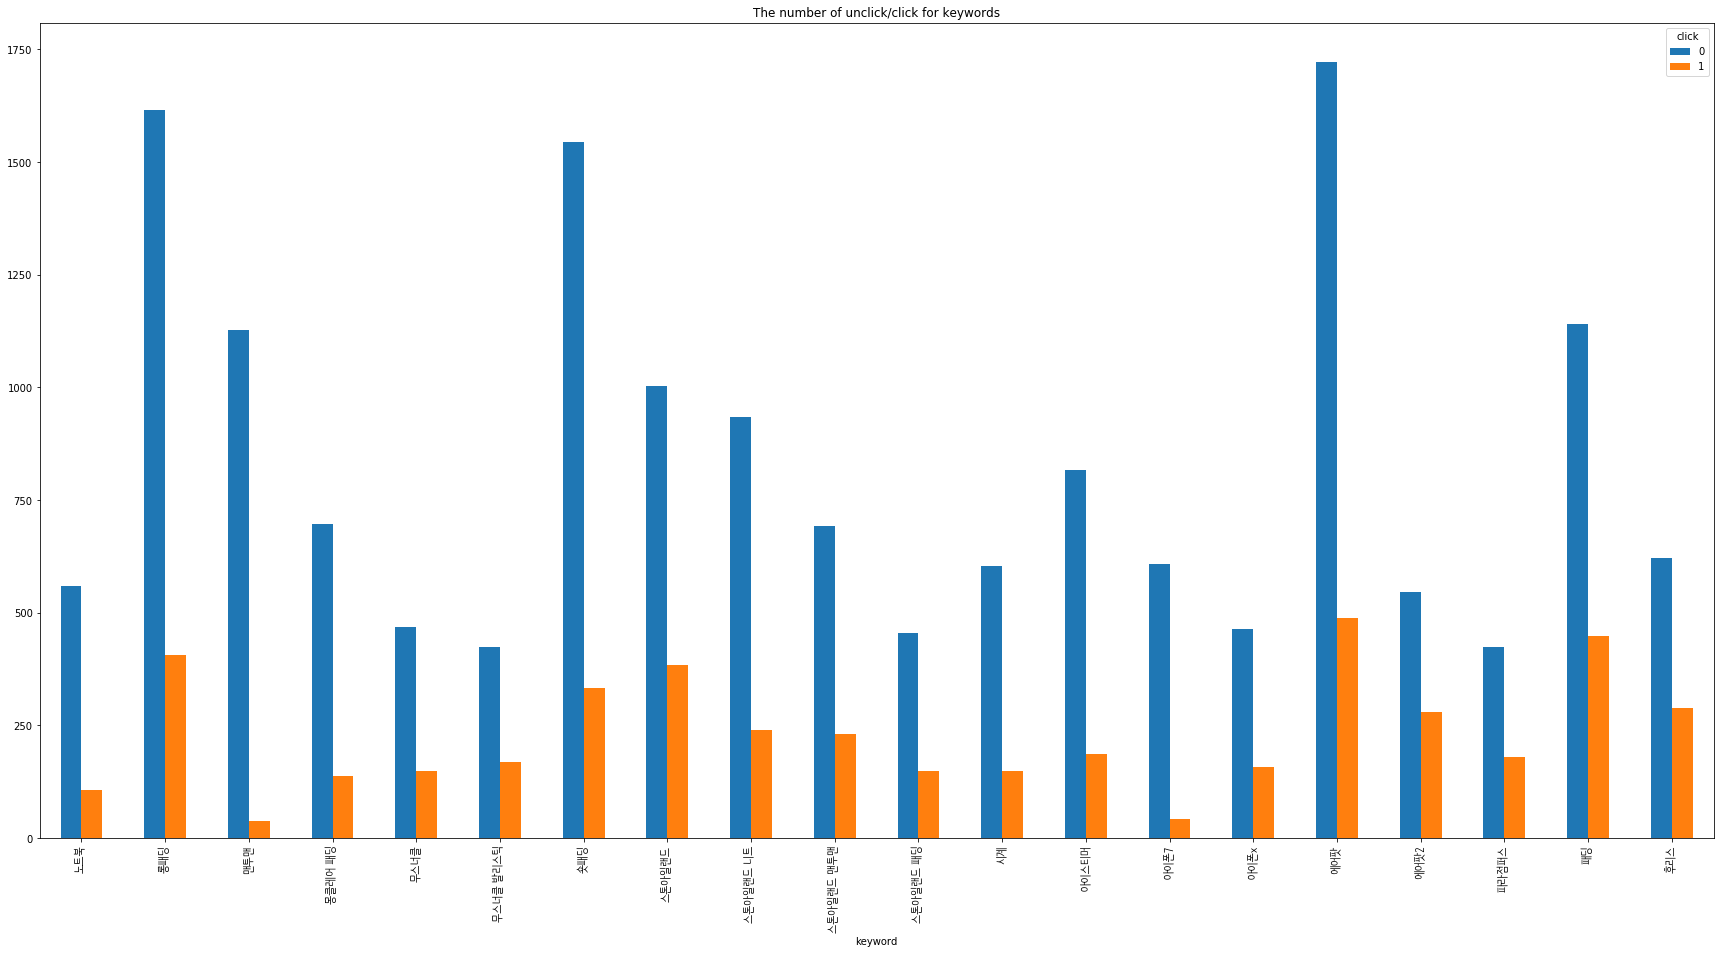

In [124]:
top_keyword = df.groupby('keyword')['id'].count().reset_index().sort_values('id', ascending = False)[:20]['keyword'].tolist()
ax = df[df['keyword'].isin(top_keyword)].groupby(['keyword', 'click']).size().unstack().plot(kind = 'bar', figsize = (30,15))
ax.set_xticklabels(['노트북', '롱패딩', '맨투맨', '몽클레어 패딩', '무스너클', '무스너클 발리스틱', '숏패딩', '스톤아일랜드', '스톤아일랜드 니트', '스톤아일랜드 맨투맨', '스톤아일랜드 패딩', '시계', '아이스티머', '아이폰7', '아이폰x', '에어팟', '에어팟2', '파라점퍼스', '패딩', '후리스'],fontproperties=fontprop)
plt.title('The number of unclick/click for keywords')
plt.savefig('top_keyword.png')

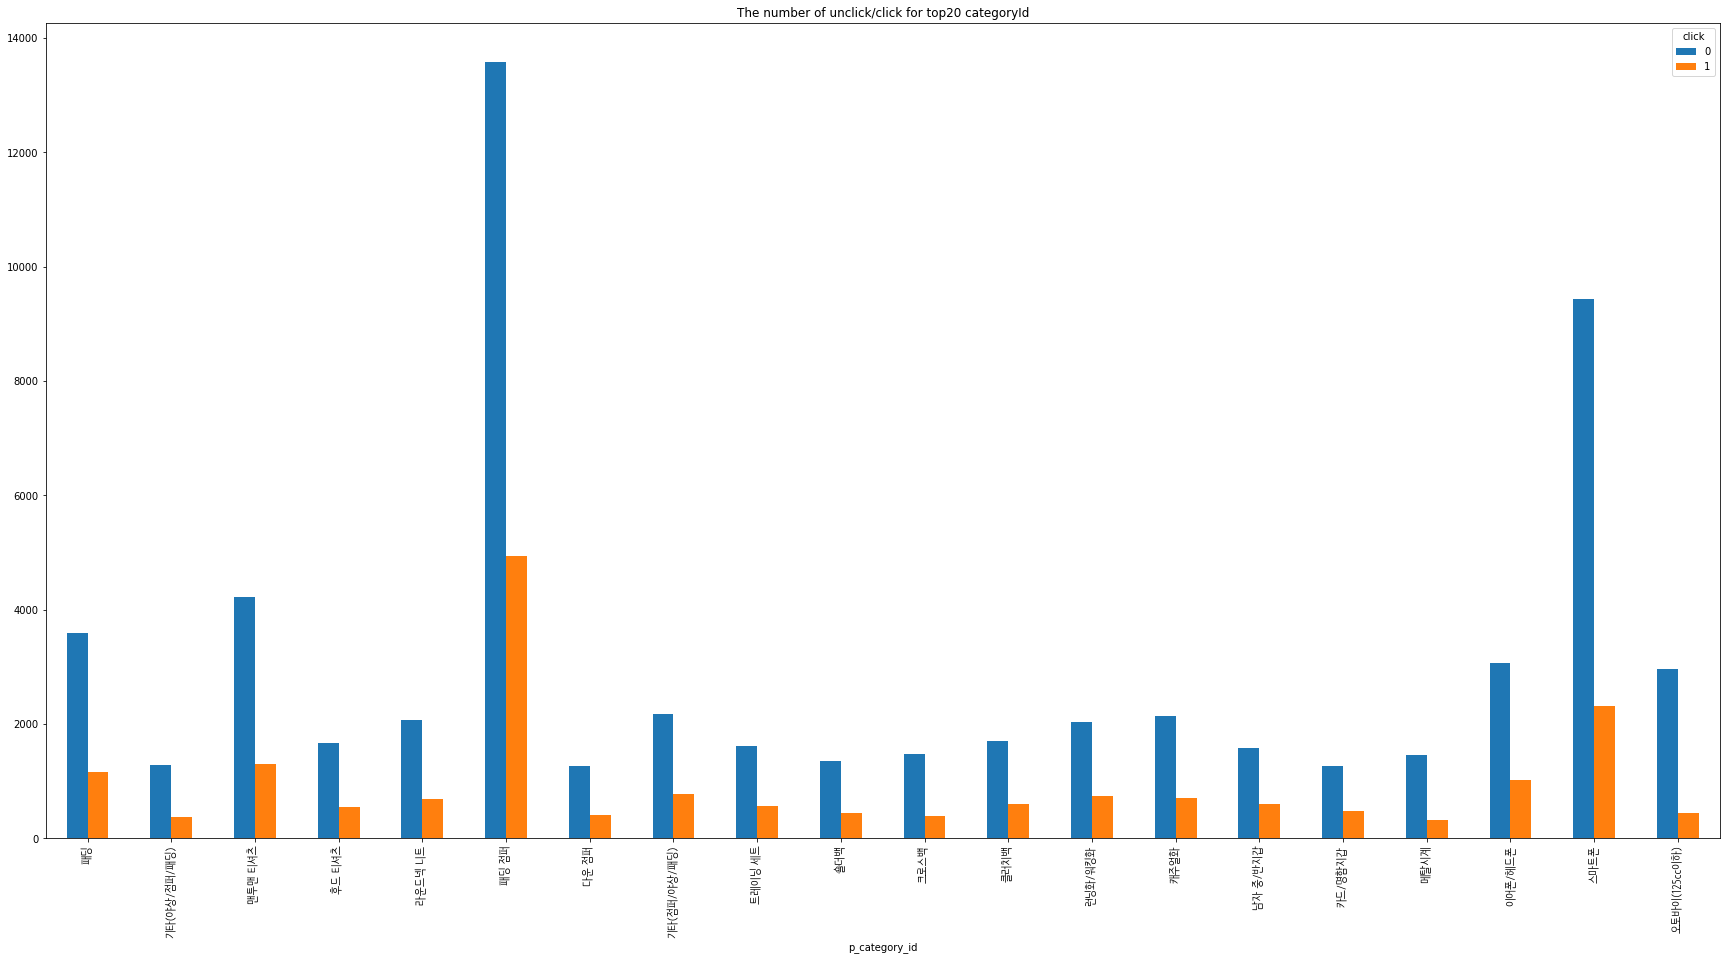

In [128]:
top_category = df.groupby('p_category_id')['id'].count().reset_index().sort_values('id', ascending = False)[:20]['p_category_id']
ax = df[df['p_category_id'].isin(top_category)].groupby(['p_category_id', 'click']).size().unstack().plot(kind = 'bar', figsize = (30,15))
ax.set_xticklabels(['패딩', '기타(야상/점퍼/패딩)', '맨투맨 티셔츠', '후드 티셔츠', '라운드넥 니트', '패딩 점퍼', '다운 점퍼', '기타(점퍼/야상/패딩)', '트레이닝 세트', '숄더백', '크로스백', '클러치백', '런닝화/워킹화', '캐주얼화', '남자 중/반지갑', '카드/명함지갑', '메탈시계', '이어폰/헤드폰', '스마트폰', '오토바이(125cc이하)'],fontproperties=fontprop)
plt.title('The number of unclick/click for top20 categoryId')
plt.savefig('top_categoryid.png')

In [129]:
first_category = list()
for id in df['p_category_id'].tolist():
    first_category.append(str(id)[:3])
df['p_1st_category'] = first_category

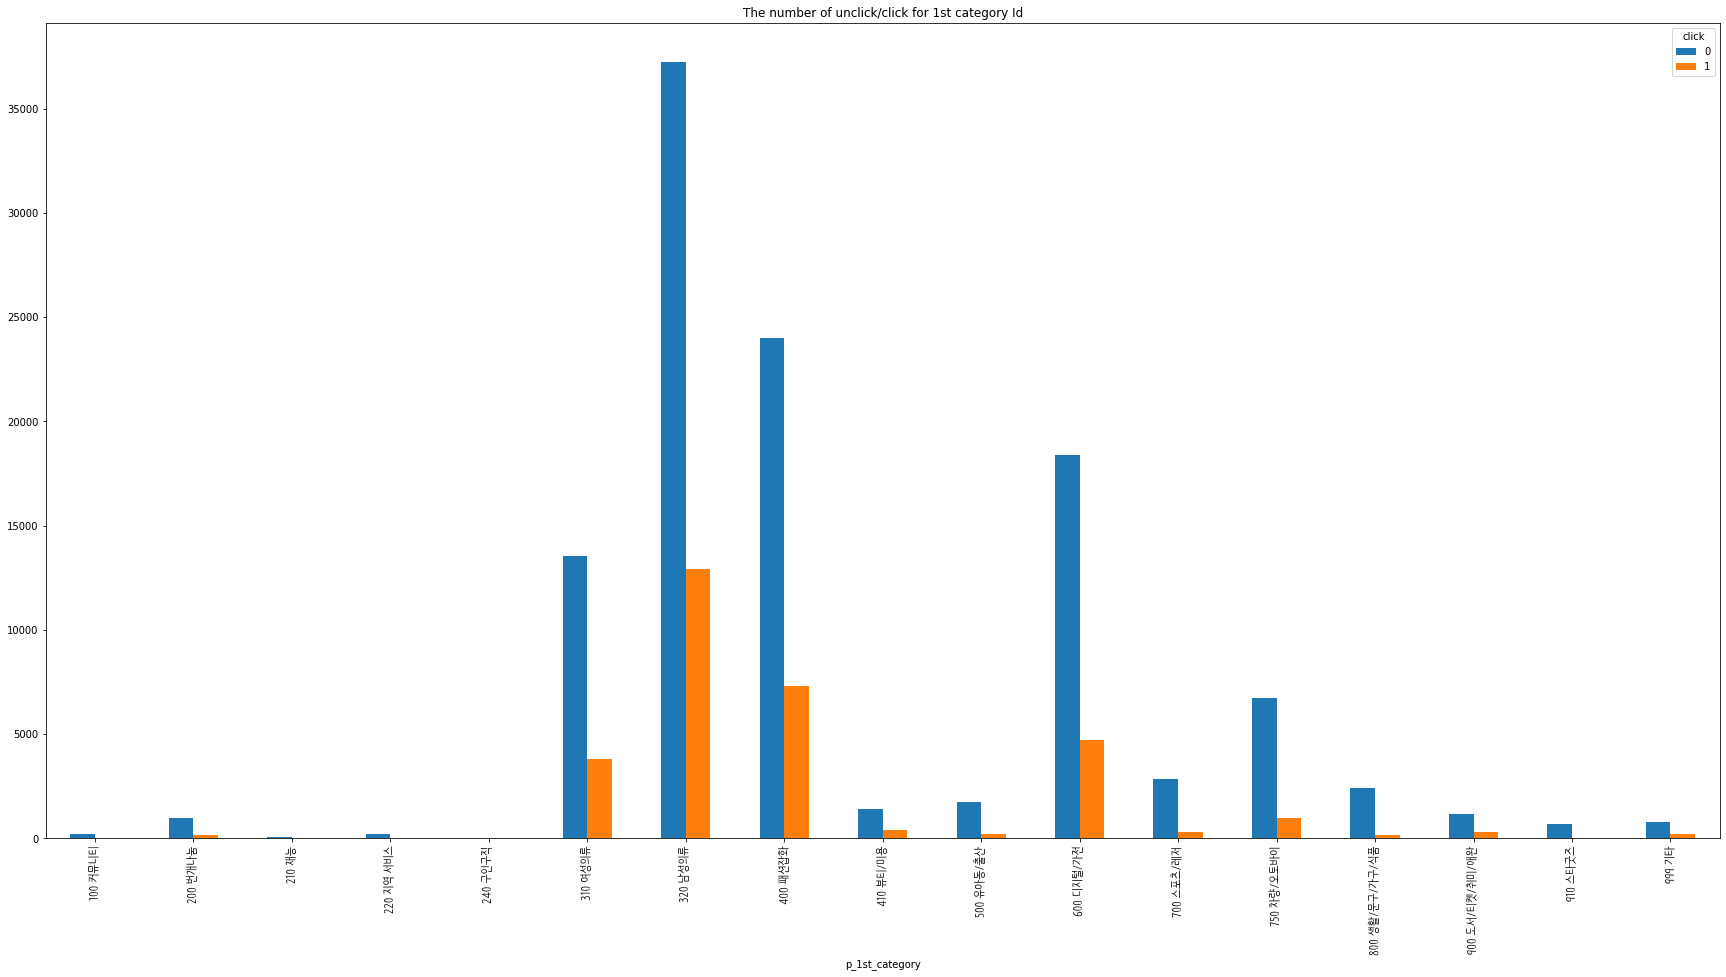

In [133]:
ax = df.groupby(['p_1st_category', 'click']).size().unstack().plot(kind = 'bar', figsize = (30,15))
ax.set_xticklabels(['100 커뮤니티', '200 번개나눔', '210 재능', '220 지역 서비스', '240 구인구직', '310 여성의류', '320 남성의류', '400 패션잡화', '410 뷰티/미용', '500 유아동/출산', '600 디지털/가전', '700 스포츠/레저', '750 차량/오토바이', '800 생활/문구/가구/식품', '900 도서/티켓/취미/애완', '910 스타굿즈', '999 기타'],fontproperties=fontprop)
plt.title('The number of unclick/click for 1st category Id')
plt.savefig('exposureForCategory.png')

### category id list
100        커뮤니티 <br />
200        번개나눔 <br />
210        재능 <br />
220        지역 서비스 <br />
230        원룸/함께살아요 <br />
240        구인구직 <br />
300        (구)패션의류 <br />
310        여성의류 <br />
320        남성의류 <br />
400        패션잡화 <br />
410        뷰티/미용 <br />
500        유아동/출산 <br />
600        디지털/가전 <br />
700        스포츠/레저 <br />
750        차량/오토바이 <br />
800        생활/문구/가구/식품 <br />
900        도서/티켓/취미/애완 <br />
910        스타굿즈 <br />
999        기타 <br />


In [134]:
age_group = df.groupby(['u_age'])

In [135]:
age_group.groups

{0: Int64Index([     0,      1,      3,      4,     22,     25,     28,     33,
                 34,     37,
             ...
             144040, 144043, 144046, 144049, 144052, 144060, 144061, 144063,
             144064, 144066],
            dtype='int64', length=39675),
 10: Int64Index([     6,      7,      9,     10,     13,     21,     26,     29,
                 30,     31,
             ...
             143926, 143941, 143986, 143989, 144021, 144024, 144042, 144044,
             144050, 144056],
            dtype='int64', length=26576),
 20: Int64Index([     2,      5,     12,     14,     16,     17,     18,     23,
                 24,     27,
             ...
             144017, 144018, 144022, 144026, 144031, 144032, 144045, 144047,
             144051, 144053],
            dtype='int64', length=35270),
 25: Int64Index([     8,     11,     15,     19,     54,     60,     66,     70,
                 75,     81,
             ...
             143965, 143976, 143982, 143992, 1

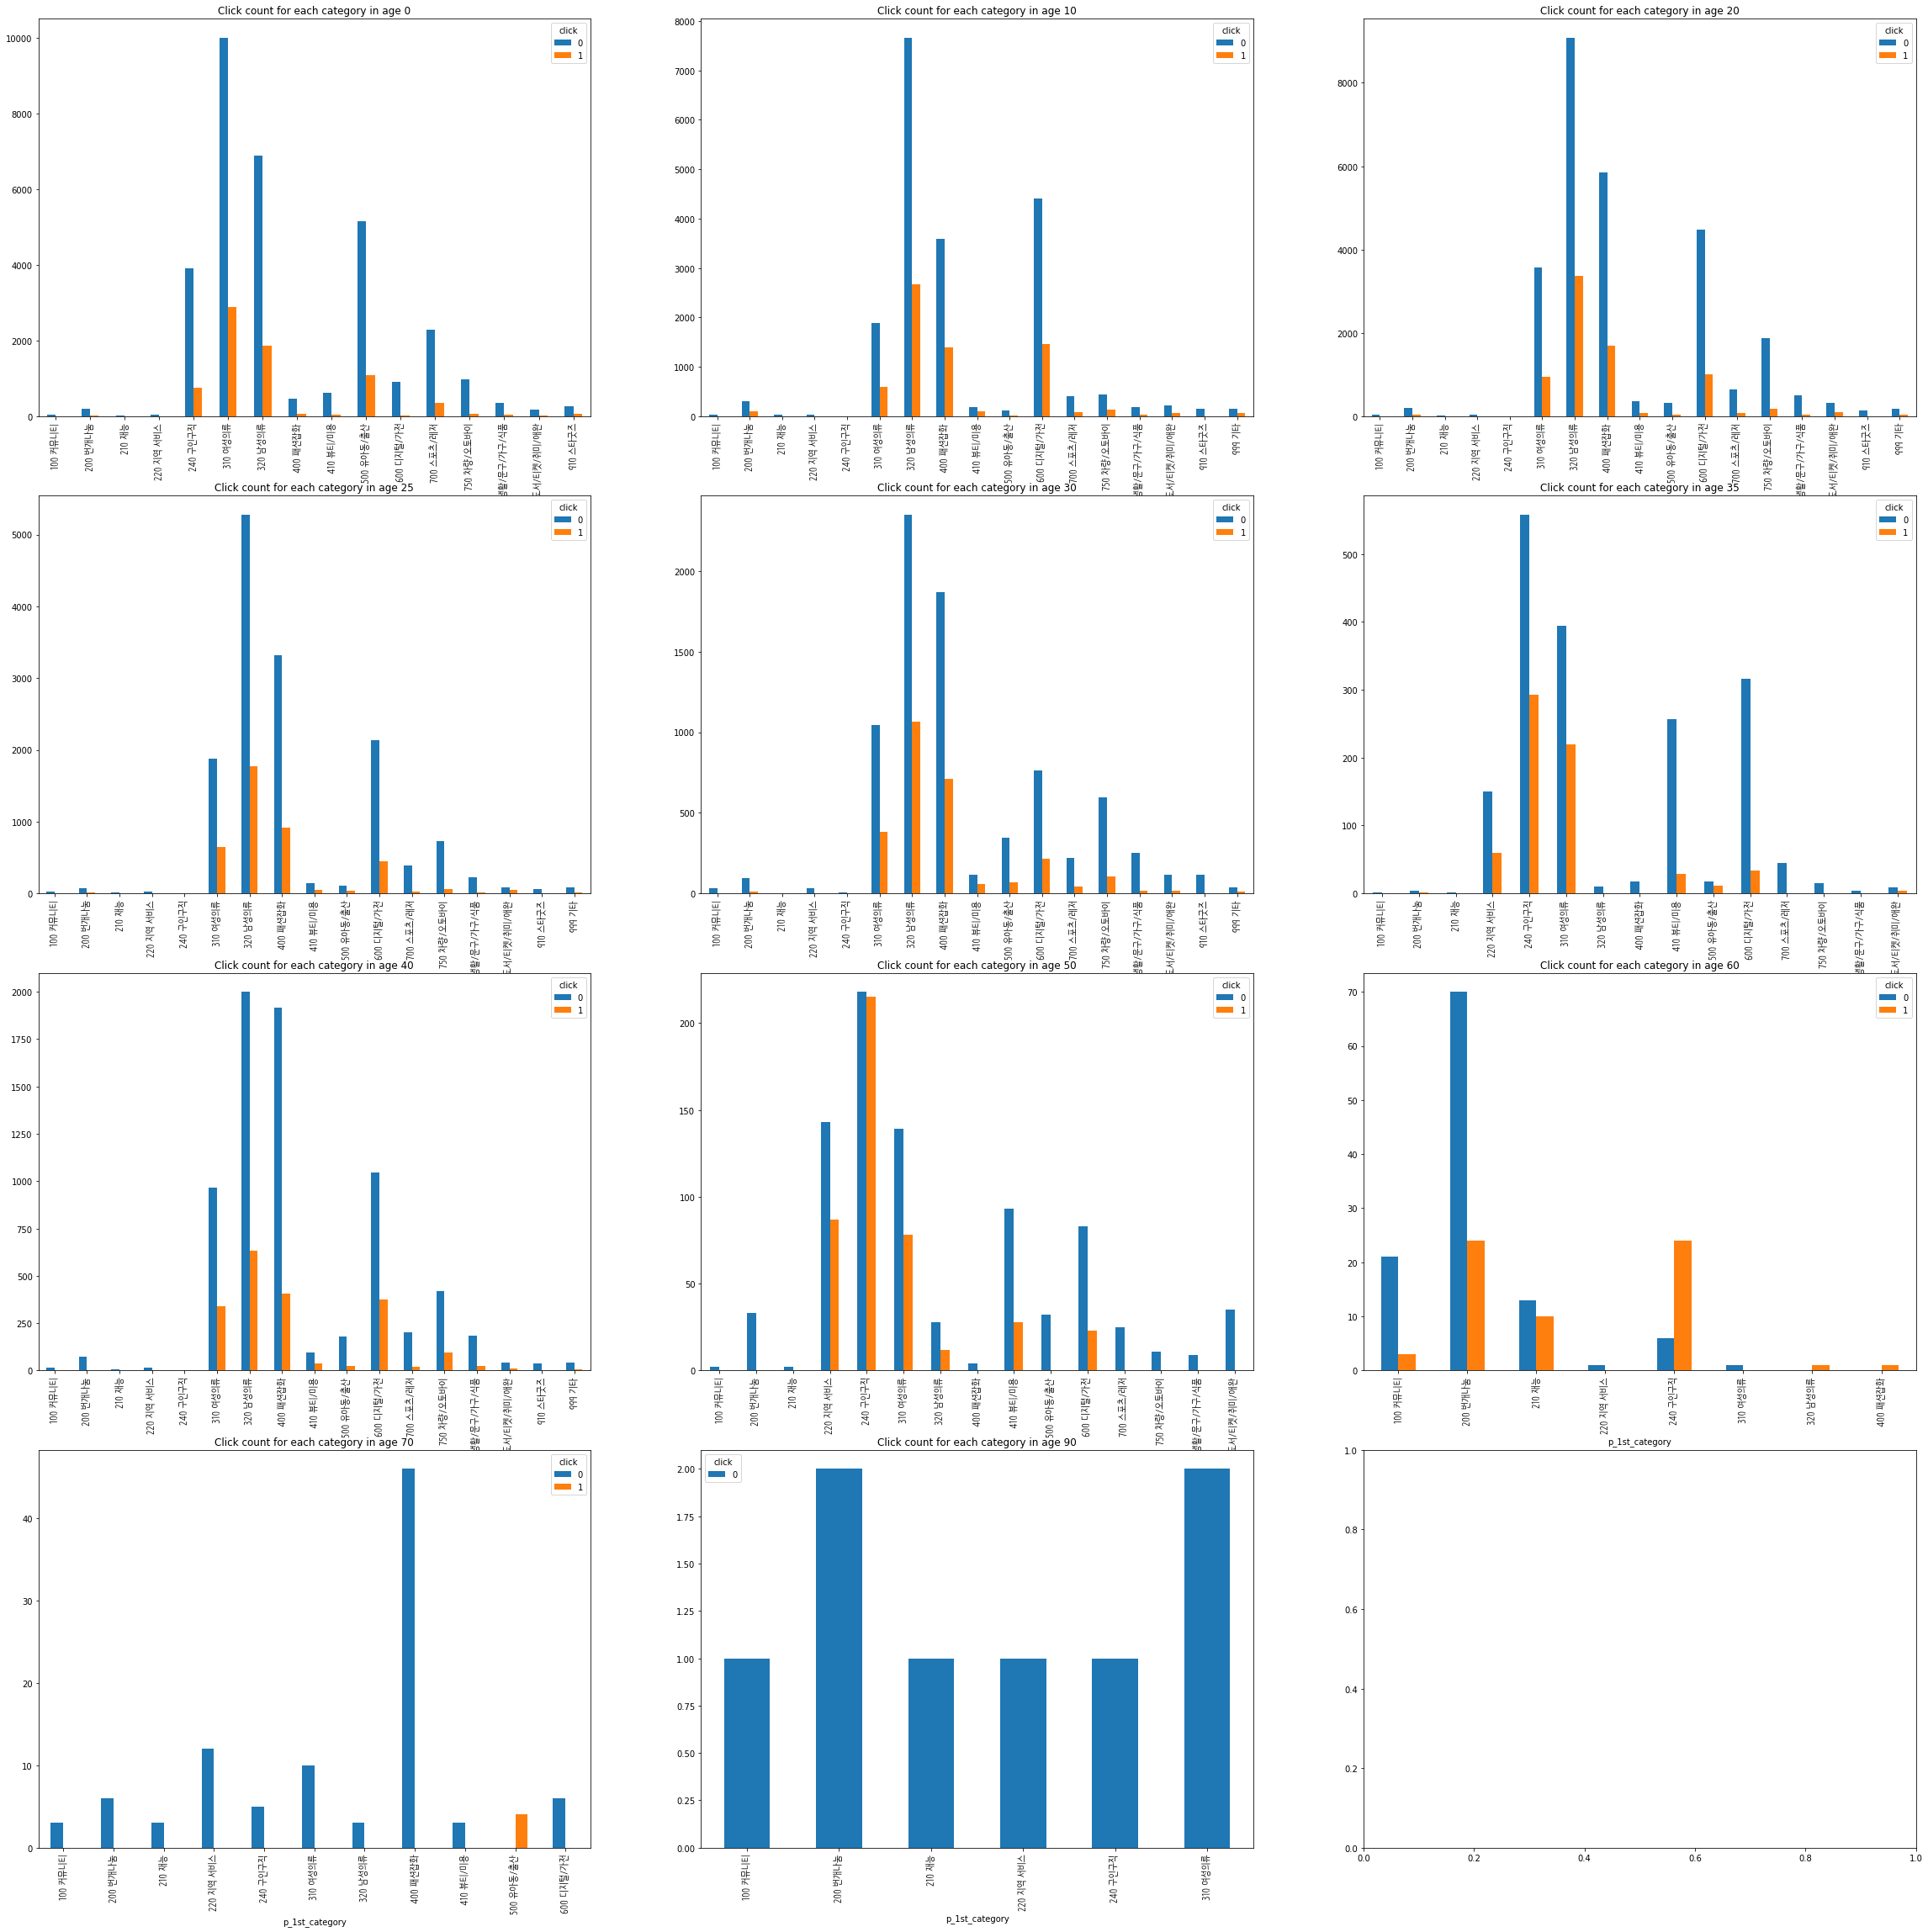

In [148]:
f, axes = plt.subplots(4,3, figsize = (40, 40))
row = 0
col = 0
for age, group in age_group:
    group.groupby(['p_1st_category', 'click']).size().unstack().plot(kind = 'bar', ax = axes[row, col])
    axes[row, col].set_title('Click count for each category in age ' + str(age))
    axes[row, col].set_xticklabels(['100 커뮤니티', '200 번개나눔', '210 재능', '220 지역 서비스', '240 구인구직', '310 여성의류', '320 남성의류', '400 패션잡화', '410 뷰티/미용', '500 유아동/출산', '600 디지털/가전', '700 스포츠/레저', '750 차량/오토바이', '800 생활/문구/가구/식품', '900 도서/티켓/취미/애완', '910 스타굿즈', '999 기타'],fontproperties=fontprop)
    col += 1
    if col == 3:
        col = 0
        row += 1
plt.savefig('exposureForAge.png')

,id,viewer_uid,viewer_device,keyword,updated,pid,ad_type,click,u_name,u_description,...,p_emergency_cnt,p_comment_cnt,p_recent_comment_cnt,p_interest,p_recent_interest,p_pfavcnt,p_recent_pavcnt,p_ptranscnt,p_recent_ptranscnt,p_is_adult
49,4889630649,5402752,a,맨투맨,2019-11-19 00:00:00,108211402,super_up,0,mcfukdonld,뚱ㅇㅣㅣㅣ,...,1,2,0,7348,0,104,0,0,0,0
50,4889284653,7736241,a,꼼데가르송 맨투맨,2019-11-19 00:07:25,108211402,super_up,0,꿀매만팔아용,처음 장사해봐요ㅠㅠ,...,1,2,0,7348,0,104,0,0,0,0
51,4889673181,5142162,i,맨투맨,2019-11-19 00:04:05,108211402,super_up,0,t빈티지t,환불은 절대 안 되니 구매 전에 신중히 고민 해주세요,...,1,2,0,7348,0,104,0,0,0,0
52,4889745465,5310398,a,라코스테,2019-11-19 00:00:28,108211402,super_up,0,한은복,NaN,...,1,2,0,7348,0,104,0,0,0,0
53,4889418941,3406357,i,노스페이스 맨투맨,2019-11-19 00:02:38,108211402,super_up,0,기륑이,NaN,...,1,2,0,7348,0,104,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133723,4889171105,5825309,i,아이스티머,2019-11-19 00:06:36,111843918,super_up,0,max_story,문의해주시면 최대한 빨리 답장해두리겠습니다~\n상점에 없는 상품도 문의가능합니다~!!!,...,0,4,0,1475,0,51,0,0,0,0
133724,4889286449,3850232,a,아이스티머,2019-11-19 00:07:54,111843918,super_up,0,에펨포유,NaN,...,0,4,0,1475,0,51,0,0,0,0
133725,4889483937,618381,i,아이스티머,2019-11-19 00:09:09,111843918,super_up,0,남자화장실,NaN,...,0,4,0,1475,0,51,0,0,0,0
133726,4889435697,2252104,i,아이스티머,2019-11-19 00:09:27,111843918,super_up,0,카키코,NaN,...,0,4,0,1475,0,51,0,0,0,0


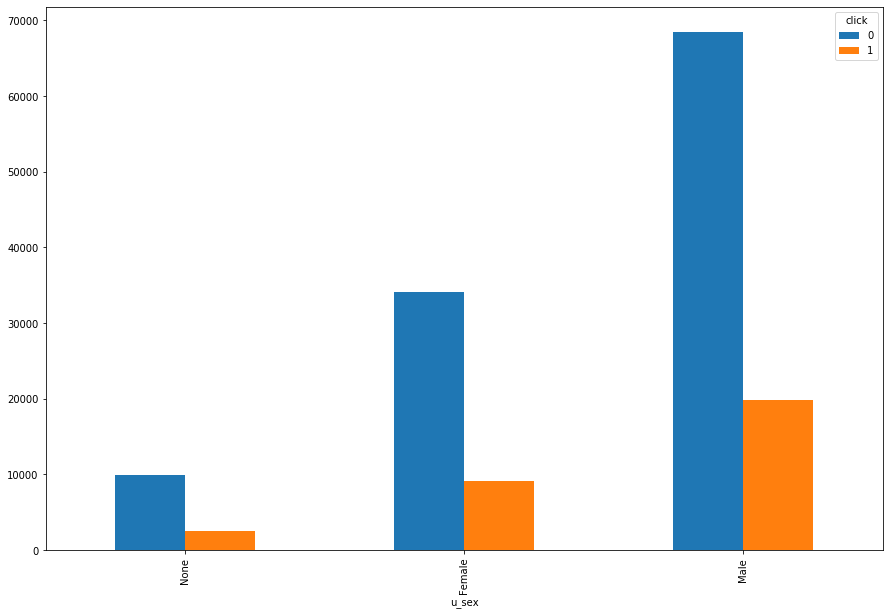

In [151]:
groupby_sex = df.groupby(['u_sex', 'click']).size().unstack().plot(kind = 'bar', figsize = (15,10))
groupby_sex.set_xticklabels(['None', 'Female', 'Male'])
plt.savefig('clickbySex.png')

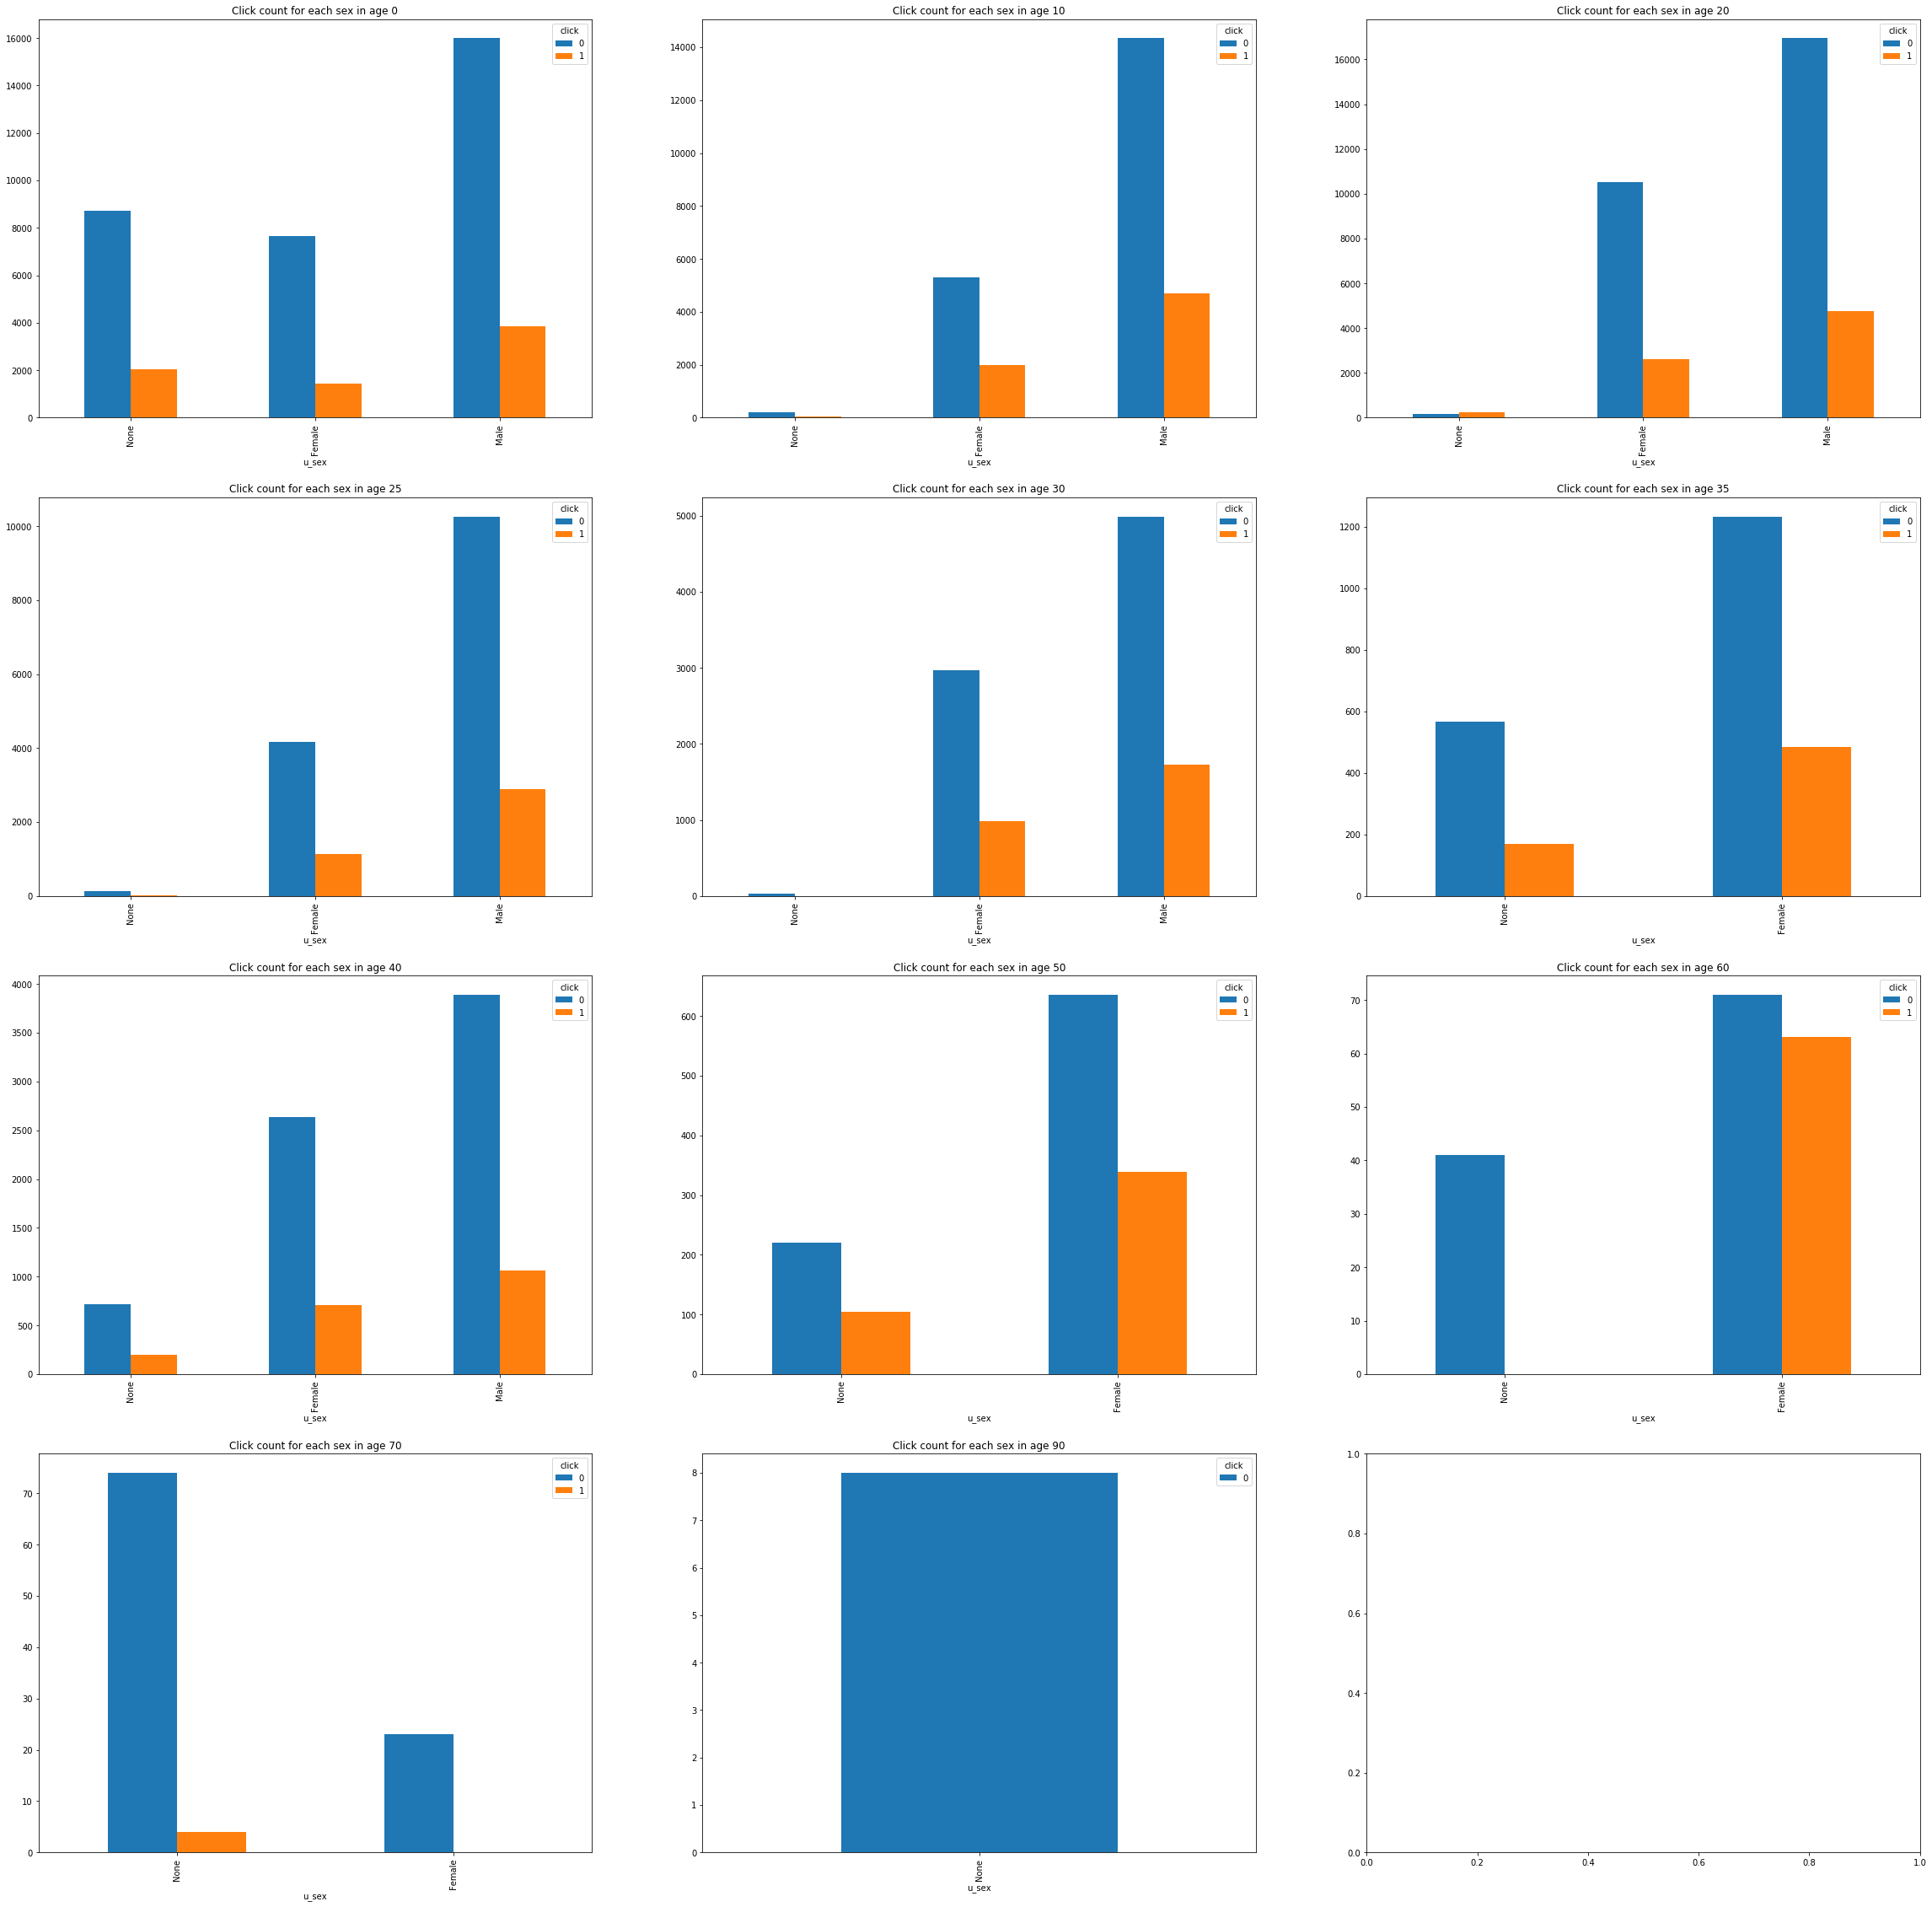

In [154]:
f, axes = plt.subplots(4,3, figsize = (40, 40))
col = 0
row = 0
for age, group in age_group:
    group.groupby(['u_sex', 'click']).size().unstack().plot(kind = 'bar', ax = axes[row, col])
    axes[row, col].set_title('Click count for each sex in age ' + str(age))
    axes[row, col].set_xticklabels(['None', 'Female', 'Male'])
    col += 1
    if col == 3:
        col = 0
        row += 1
plt.savefig('exposureForAgeandSex.png')

Text(0.5, 1.0, 'The number of clicks by gender over time')

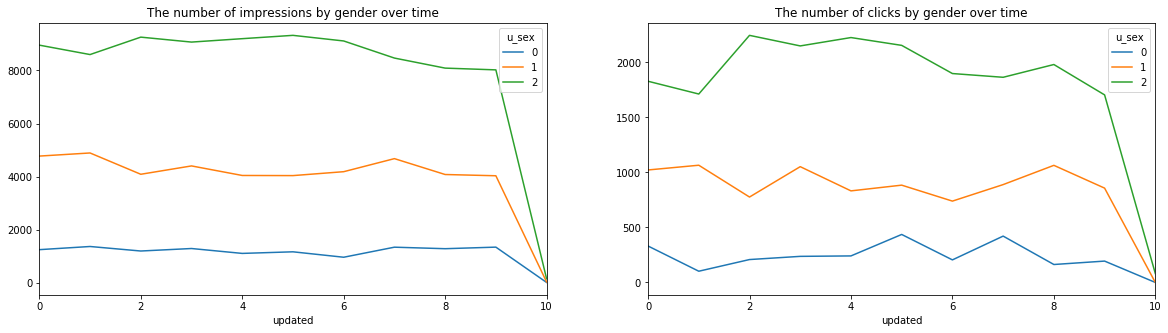

In [39]:
f,ax=plt.subplots(1,2,figsize=(20,5))
df.groupby([times.minute, 'u_sex'])['id'].count().unstack().plot(ax = ax[0])
ax[0].set_title('The number of impressions by gender over time')

df.groupby([times.minute, 'u_sex'])['click'].sum().unstack().plot(ax = ax[1])
ax[1].set_title('The number of clicks by gender over time')

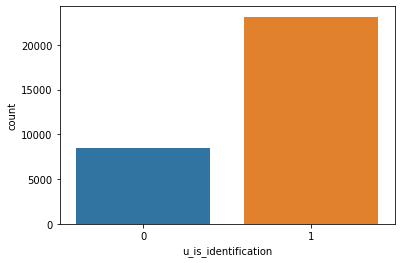

In [40]:
sns.countplot('u_is_identification', data = df[df['click'] == 1])

In [41]:
print('proportion of female clicks :', df[(df['click'] == 1) & (df['u_sex'] == 1)]['id'].count()/df[df['u_sex'] == 1]['id'].count(), 
'proportion of male clicks :', df[(df['click'] == 1) & (df['u_sex'] == 2)]['id'].count()/df[df['u_sex'] == 2]['id'].count())

proportion of female clicks : 0.21180868000276873 proportion of male clicks : 0.22481841154007412


count    3.155800e+04
mean     1.425222e+06
std      3.070099e+07
min      0.000000e+00
25%      3.990000e+04
50%      8.700000e+04
75%      2.150000e+05
max      1.000000e+09
Name: p_price, dtype: float64

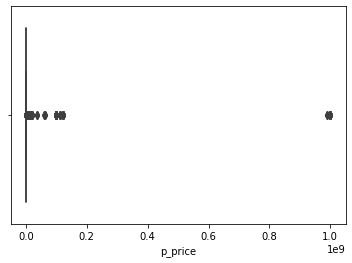

In [42]:
sns.boxplot('p_price', data = df_s[df['click'] == 1])
df[df['click'] == 1]['p_price'].describe()

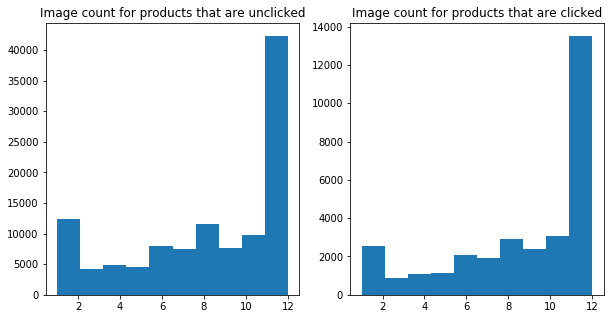

In [155]:
f,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].hist(df[df['click'] == 0]['p_image_count'])
ax[0].set_title('Image count for products that are unclicked')

ax[1].hist(df[df['click'] == 1]['p_image_count'])
ax[1].set_title('Image count for products that are clicked')

plt.savefig('imageCnt.png')

In [453]:
# df['u_birthdate'].unique()
# the proportion of u_birthdate == NaN 
len(df[df['u_birthdate'].isna()])/len(df)

0.12996036566319838

In [467]:
df.sort_values('p_emergency_cnt', ascending = False)[:20]

,id,viewer_uid,viewer_device,keyword,updated,pid,ad_type,click,u_name,u_description,...,p_comment_cnt,p_recent_comment_cnt,p_interest,p_recent_interest,p_pfavcnt,p_recent_pavcnt,p_ptranscnt,p_recent_ptranscnt,p_is_adult,p_1st_category
8255,4889789601,3022793,i,에어팟,2019-11-19 00:07:49,31537985,super_up,0,이정연연,NaN,...,791,2670,3020267,0,35216,104,0,31,0,410
8253,4889654177,4853566,a,에어팟,2019-11-19 00:02:37,31537985,super_up,0,픽도의기본,NaN,...,791,2670,3020267,0,35216,104,0,31,0,410
8247,4889524805,9329796,i,에어팟,2019-11-19 00:02:59,31537985,super_up,0,쿨1거1래1,NaN,...,791,2670,3020267,0,35216,104,0,31,0,410
8248,4889481297,2143432,i,에어팟,2019-11-19 00:08:22,31537985,super_up,1,전력량,NaN,...,791,2670,3020267,0,35216,104,0,31,0,410
8249,4889785041,2143432,i,에어팟,2019-11-19 00:06:32,31537985,super_up,0,전력량,NaN,...,791,2670,3020267,0,35216,104,0,31,0,410
8250,4889171069,7861959,a,에어팟,2019-11-19 00:06:36,31537985,super_up,0,자라목두꺼비,NaN,...,791,2670,3020267,0,35216,104,0,31,0,410
8251,4889116825,3637057,i,아이팟,2019-11-19 00:02:41,31537985,super_up,0,상점3637057호,NaN,...,791,2670,3020267,0,35216,104,0,31,0,410
8252,4889116825,3637057,i,아이팟,2019-11-19 00:02:41,31537985,super_up,0,상점3637057호,NaN,...,791,2670,3020267,0,35216,104,0,31,0,410
8254,4889203541,3022793,i,에어팟,2019-11-19 00:03:51,31537985,super_up,1,이정연연,NaN,...,791,2670,3020267,0,35216,104,0,31,0,410
8262,4889404449,3974084,i,에어팟,2019-11-19 00:06:13,31537985,super_up,1,skld,NaN,...,791,2670,3020267,0,35216,104,0,31,0,410


In [503]:
emergency_group = df.groupby(['p_emergency_cnt', 'pid', 'p_1st_category', 'click'])['id'].count().reset_index()

In [504]:
emergency_group[:20]

,p_emergency_cnt,pid,p_1st_category,click,id
0,0,22664907,400,0,9
1,0,22664907,400,1,5
2,0,30215018,400,0,6
3,0,30215018,400,1,2
4,0,32338637,400,0,23
5,0,32338637,400,1,4
6,0,34862312,400,0,26
7,0,34862312,400,1,6
8,0,34918745,400,0,11
9,0,34918745,400,1,1


In [517]:
emergency_group = emergency_group.rename(columns = {'id':'count'})
emergency_group[emergency_group['p_emergency_cnt'] > 3].groupby(['p_emergency_cnt', 'p_1st_category', 'click'])['count'].sum().reset_index()[:]

,p_emergency_cnt,p_1st_category,click,count
0,4,310,0,49
1,4,310,1,8
2,4,320,0,291
3,4,320,1,90
4,4,400,0,240
5,4,400,1,64
6,4,410,0,89
7,4,410,1,21
8,4,600,0,268
9,4,600,1,66
